# This notebook focuses on EDA to better understand data, and look for visual insights that a coach may find useful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [5]:
df.columns

Index(['release_speed_kph', 'swing_angle', 'deviation', 'release_position_y',
       'release_position_z', 'bounce_position_y', 'bounce_position_x',
       'crease_position_y', 'crease_position_z', 'stumps_position_y',
       'stumps_position_z', 'bounce_velocity_ratio_z', 'release_angle',
       'drop_angle', 'bounce_angle', 'batting_hand', 'bowling_hand',
       'bowling_type', 'runs', 'wicket'],
      dtype='object')

In [8]:
df['batting_hand']

0          left
1         right
2         right
3         right
4         right
          ...  
200784     left
200785     left
200786    right
200787    right
200788     left
Name: batting_hand, Length: 200789, dtype: object

# Understanding the data / EDA

In [9]:
df[df['wicket']==1]['runs'].sum() # runs is always 0 if wicket is 1

0

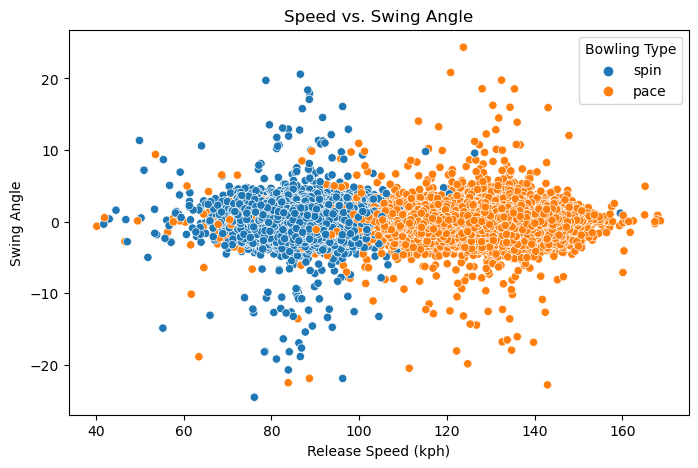

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='release_speed_kph', y='swing_angle', hue='bowling_type')
plt.xlabel("Release Speed (kph)")
plt.ylabel("Swing Angle")
plt.title("Speed vs. Swing Angle")
plt.legend(title="Bowling Type")
plt.show()

In [6]:
df['absolute_swing_angle'] = abs(df['swing_angle'])

In [7]:
df[['bowling_type','absolute_swing_angle']].groupby('bowling_type').agg(['mean','median','std'])

absolute_swing_angle                 
                             mean median       std
bowling_type                                      
pace                     0.738679   0.55  0.746888
spin                     1.196939   1.08  0.911445

# As expected , mean and median spin angles are far greater than those of pace. However, it is interesting to see that pace movement has a significantly lower standard deviation than that of spin (maybe because part time spinners generate lesser spin, and we don't see too many part time pacers?)

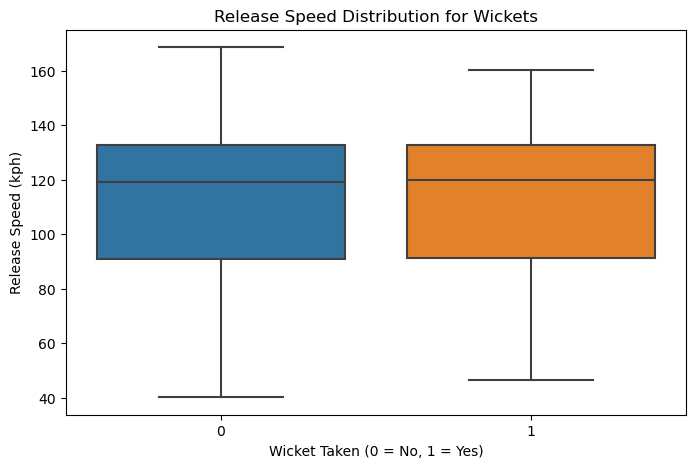

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="wicket", y="release_speed_kph")
plt.xlabel("Wicket Taken (0 = No, 1 = Yes)")
plt.ylabel("Release Speed (kph)")
plt.title("Release Speed Distribution for Wickets")
plt.show()

# Speeds alone dont seem to be an indication of a wicket taking delivery

C:\Users\Vijay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


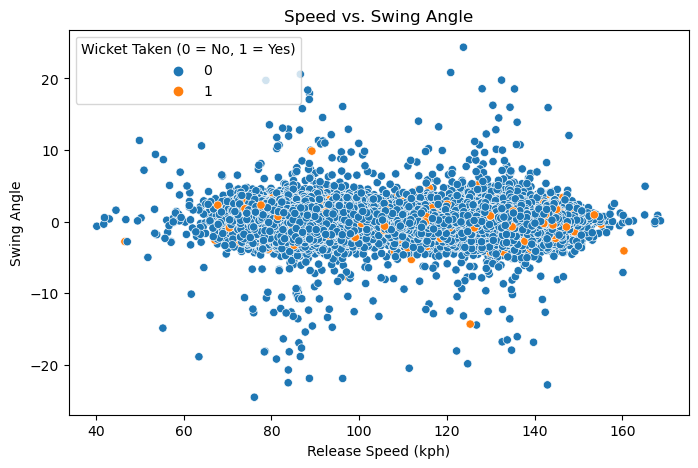

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='release_speed_kph', y='swing_angle', hue='wicket')
plt.xlabel("Release Speed (kph)")
plt.ylabel("Swing Angle")
plt.title("Speed vs. Swing Angle")
plt.legend(title="Wicket Taken (0 = No, 1 = Yes)")
plt.show()

In [7]:
df[['wicket','release_speed_kph','swing_angle']].groupby('wicket').agg(['mean','median','std'])

release_speed_kph                    swing_angle                 
                    mean  median        std        mean median       std
wicket                                                                  
0             113.284895  119.23  21.581512    0.181682   0.19  1.229167
1             113.869584  119.79  21.435392    0.173172   0.16  1.145096

# Surprisingly ,release and speeds, individually, dont seem to product a wicket independently

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="bounce_position_x", y="bounce_position_y", fill=True, cmap="coolwarm")
plt.axhline(0, color='black', linestyle='--', label="Middle Stump Line")
plt.xlabel("Length (Bounce Position X)")
plt.ylabel("Line (Bounce Position Y)")
plt.title("Heatmap of Line & Length")
plt.legend()
plt.show()

C:\Users\Vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vijay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\Vijay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


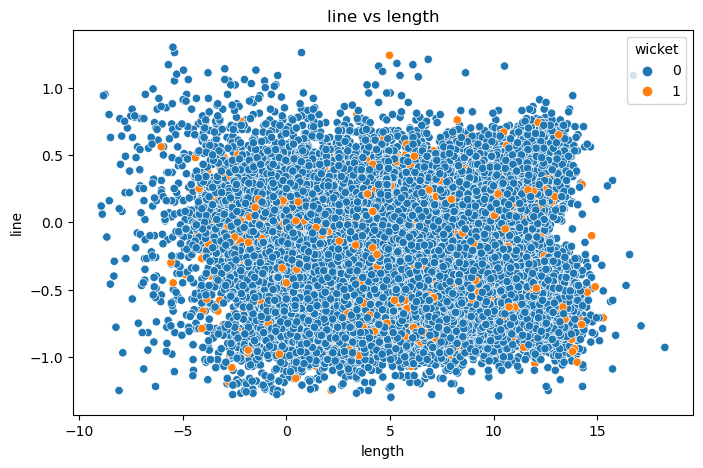

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df[df['batting_hand']=='right'], x='bounce_position_x', y='bounce_position_y', hue='wicket')
plt.xlabel("length")
plt.ylabel("line")
plt.title("line vs length")
plt.legend(title="wicket")
plt.show()

# No obvious connection between line+length and wicket taking deliveries on the first look

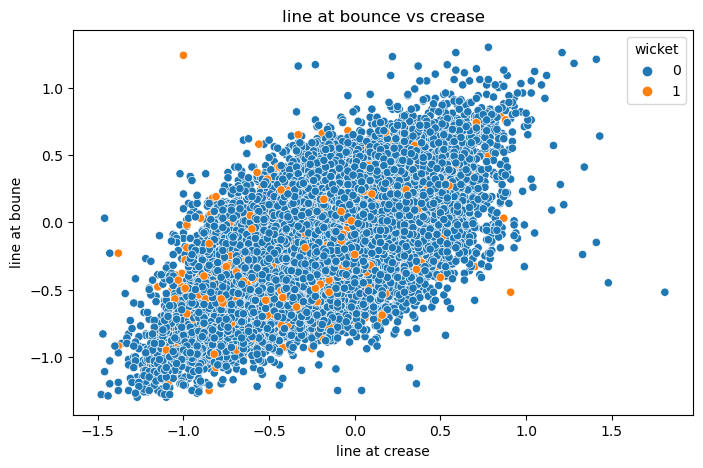

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df[df['batting_hand']=='right'], x='crease_position_y', y='bounce_position_y', hue='wicket')
plt.xlabel("line at crease")
plt.ylabel("line at boune")
plt.title("line at bounce vs crease")
plt.legend(title="wicket")
plt.show()

# In the above plot, points away from the seemingly linear trajectory indicate high movement deliveries. No obvious correlation between a wicket and high movement

# Initial thoughts - a wicket is the output of many different 'features' executed right, and more so, set ups (previous deliveries), and personal weaknesses of batters

C:\Users\Vijay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


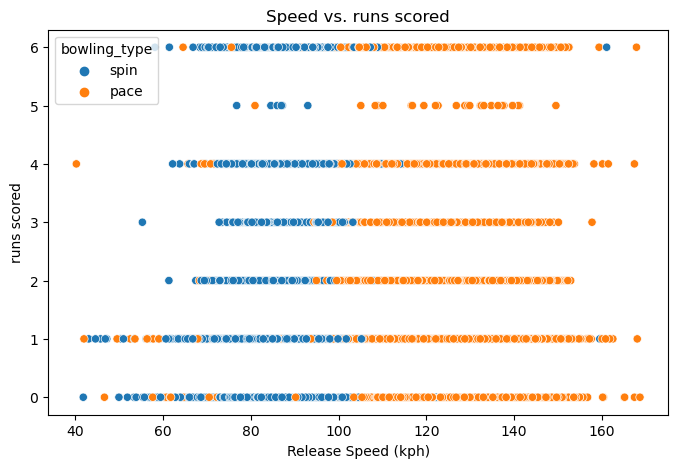

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='release_speed_kph', y='runs',hue='bowling_type')
plt.xlabel("Release Speed (kph)")
plt.ylabel("runs scored")
plt.title("Speed vs. runs scored")
plt.show()

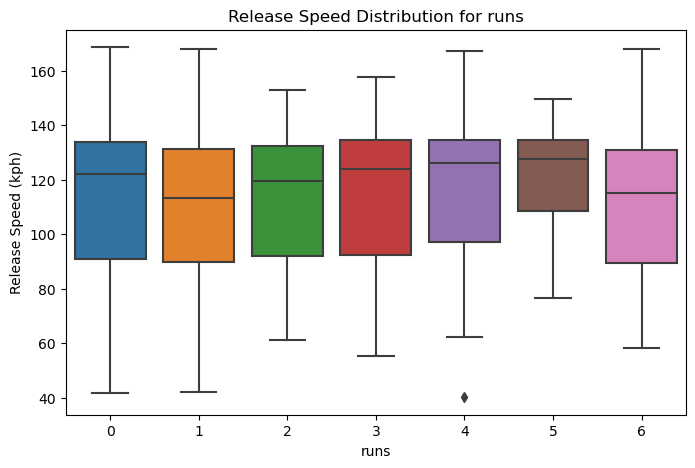

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="runs", y="release_speed_kph")
plt.xlabel("runs")
plt.ylabel("Release Speed (kph)")
plt.title("Release Speed Distribution for runs")
plt.show()

In [15]:
df[['runs','bowling_type','release_speed_kph']].groupby(['runs','bowling_type']).agg(['mean','median','std'])

release_speed_kph                    
                               mean   median        std
runs bowling_type                                      
0    pace                129.117080  131.465  11.317244
     spin                 88.602732   88.030   7.091391
1    pace                126.698929  129.440  12.346615
     spin                 88.705310   88.130   7.084999
2    pace                126.770680  129.425  11.933560
     spin                 88.618410   88.140   6.967684
3    pace                128.849162  131.970  11.491893
     spin                 87.602976   87.010   6.821233
4    pace                128.923094  131.270  11.124921
     spin                 89.272556   88.830   7.577411
5    pace                126.595667  131.085  14.174677
     spin                 85.720000   86.455   5.251213
6    pace                126.119560  128.705  12.072770
     spin                 88.241083   87.640   7.221337

# Seems like speed alone does not impact runs scored

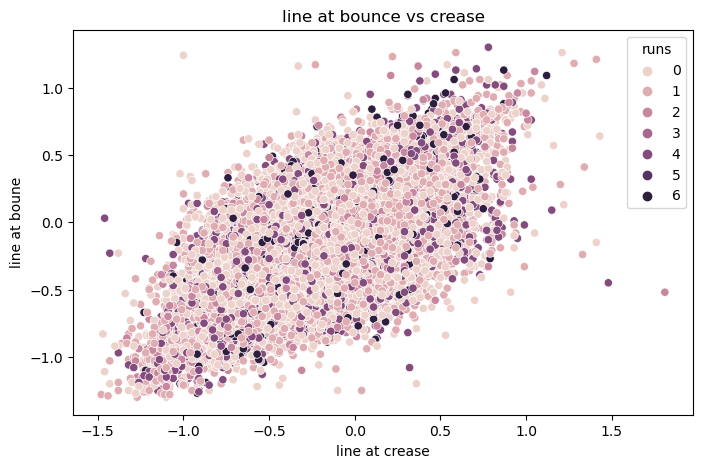

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df[df['batting_hand']=='right'], x='crease_position_y', y='bounce_position_y', hue='runs')
plt.xlabel("line at crease")
plt.ylabel("line at boune")
plt.title("line at bounce vs crease")
plt.legend(title="runs")
plt.show()

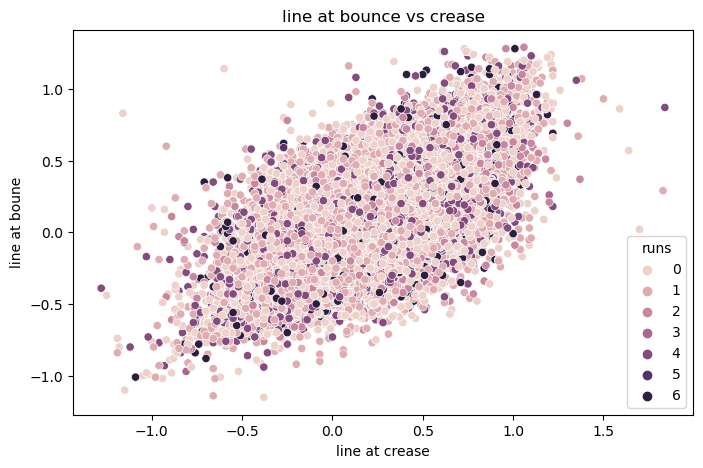

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df[df['batting_hand']=='left'], x='crease_position_y', y='bounce_position_y', hue='runs')
plt.xlabel("line at crease")
plt.ylabel("line at boune")
plt.title("line at bounce vs crease")
plt.legend(title="runs")
plt.show()

# It can be seen that not many sixes have been scored when there is large amount of movement (away from the seemingly linear trajectory)

C:\Users\Vijay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


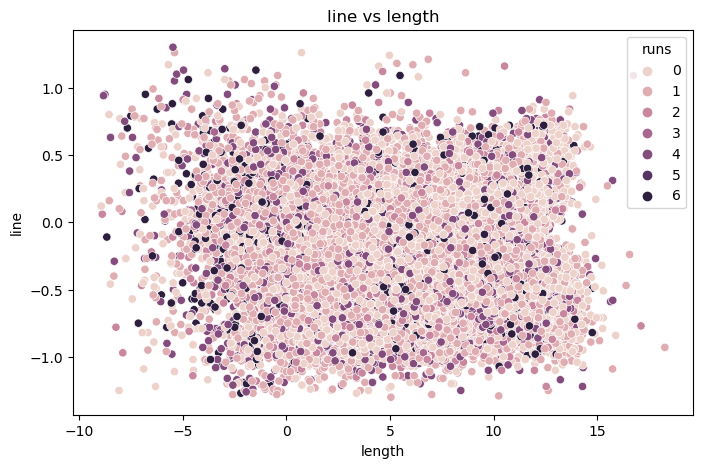

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df[df['batting_hand']=='right'], x='bounce_position_x', y='bounce_position_y', hue='runs')
plt.xlabel("length")
plt.ylabel("line")
plt.title("line vs length")
plt.legend(title="runs")
plt.show()

# It can be seen that 4s and 6s are mostly present towards either left or right, indicating larger absolute lengths produce larger number of boundaries

In [3]:
def classify_length(row):
    if pd.isna(row['bounce_position_x']) or row['bounce_position_x'] > 19:
        if row['release_position_z'] >= 1.8:  
            return 'beamer'
        return 'full_toss'
    elif row['bounce_position_x'] <= 2:
        return 'yorker'
    elif row['bounce_position_x'] <= 4.5:
        return 'full'
    elif row['bounce_position_x'] <= 7:
        return 'good_length'
    else:
        return 'short_pitched'

df['delivery length'] = df.apply(classify_length, axis=1)

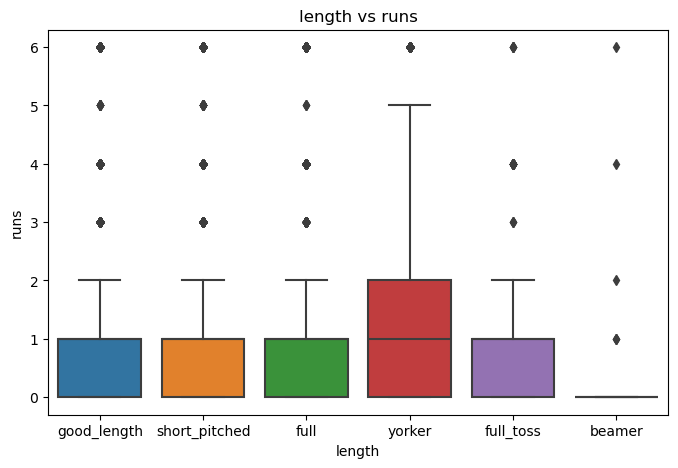

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="delivery length", y="runs")
plt.xlabel("length")
plt.ylabel("runs")
plt.title("length vs runs")
plt.show()

# Surprsingly, yorker lengths seem to produce larger number of boundaries

In [5]:
df[['runs','delivery length']].groupby(['delivery length']).agg(['mean','median','std'])

runs                 
                     mean median       std
delivery length                           
beamer           0.405405    0.0  1.212423
full             1.371013    1.0  1.610031
full_toss        1.168103    1.0  1.445165
good_length      1.229757    1.0  1.627749
short_pitched    1.286315    1.0  1.633093
yorker           1.433292    1.0  1.613621

# Beamers obviously have a lower percentage of runs scored off the bat. They will be no-balls

In [7]:
def classify_line(row):
    y_pos = row['stumps_position_y']  # Use the final position near stumps
    batter_hand = row['batting_hand']  # Batter handedness

    if -0.2 <= y_pos <= 0.2:  # Close to middle stump
        return 'straight'
    
    if batter_hand == 'right':  
        return 'wide_off_side' if y_pos < -0.2 else 'wide_leg_side'
    else:  # Left-handed batter
        return 'wide_leg_side' if y_pos < -0.2 else 'wide_off_side'

df['delivery_line'] = df.apply(classify_line, axis=1)

In [8]:
df[['runs','delivery_line']].groupby(['delivery_line']).agg(['mean','median','std'])

runs                 
                   mean median       std
delivery_line                           
straight       1.211618    1.0  1.551581
wide_leg_side  1.346046    1.0  1.625141
wide_off_side  1.355824    1.0  1.694998

# Staight balls have a lower mean number of runs with a lower standard deviation as well

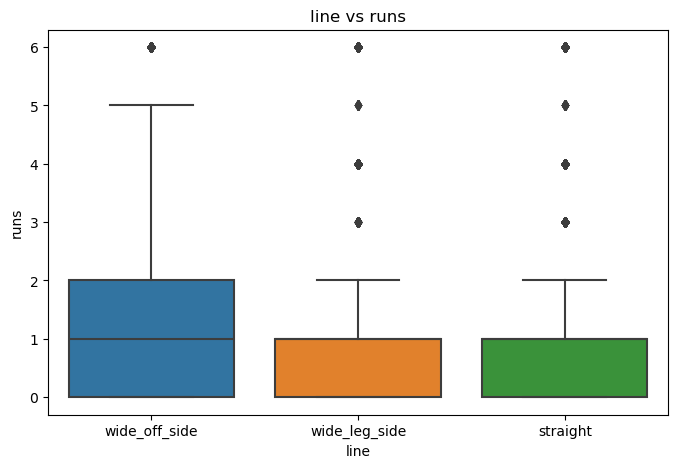

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="delivery_line", y="runs")
plt.xlabel("line")
plt.ylabel("runs")
plt.title("line vs runs")
plt.show()

In [12]:
df[['runs','delivery_line','delivery length']].groupby(['delivery_line','delivery length']).agg(['mean','median','std','count'])

runs                        
                                   mean median       std  count
delivery_line delivery length                                  
straight      beamer           0.875000    0.0  2.100170      8
              full             1.260488    1.0  1.506644  16734
              full_toss        1.200000    1.0  1.643168      5
              good_length      1.144145    1.0  1.546397  34930
              short_pitched    1.230217    1.0  1.574633  31783
              yorker           1.381199    1.0  1.562745   5606
wide_leg_side beamer           0.000000    0.0  0.000000     12
              full             1.261777    1.0  1.460055   4649
              full_toss        1.084848    1.0  1.372225    165
              good_length      1.223661    1.0  1.564587   8343
              short_pitched    1.481648    1.0  1.752952   7329
              yorker           1.588444    1.0  1.707253   1973
wide_off_side beamer           0.470588    0.0  1.067570     17
              full             1.520479    1.0  1.741058  15772
              full_toss        1.387097    1.0  1.613009     62
              good_length      1.326208    1.0  1.723861  31532
              short_pitched    1.296187    1.0  1.655377  35589
              yorker           1.431051    1.0  1.625179   6280

# Straight good length deliveries are the way to go!